In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import os

In [ ]:
at = pd.read_csv('/content/Toddler Autism data.csv')
at.shape


(1054, 19)

In [ ]:
at.head()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [ ]:
at.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [ ]:
at.isnull().sum()


,0
Case_No,0
A1,0
A2,0
A3,0
A4,0
A5,0
A6,0
A7,0
A8,0
A9,0


In [ ]:
at = at.rename(columns={"Age_Mons":"Age Months",
                        "Family_mem_with_ASD":"Family Member with ASD",
                        "Class/ASD Traits ": "ASD Traits"})
at.columns


Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age Months', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family Member with ASD', 'Who completed the test', 'ASD Traits'],
      dtype='object')

In [ ]:
at["Ethnicity"] = at["Ethnicity"].replace("mixed", "Others")
at["Ethnicity"] = at["Ethnicity"].replace("Native Indian", "South Asian")
at["Ethnicity"] = at["Ethnicity"].replace("asian", "Other Asians")
at["Ethnicity"] = at["Ethnicity"].replace("middle eastern", "Middle Eastern")
at["Ethnicity"] = at["Ethnicity"].replace("south asian", "South Asian")
at["Ethnicity"] = at["Ethnicity"].replace("black", "African")

In [ ]:
at["Ethnicity"].value_counts()

,count
Ethnicity,
White European,334
Other Asians,299
Middle Eastern,188
South Asian,63
African,53
Others,43
Hispanic,40
Latino,26
Pacifica,8


In [ ]:
at["Who completed the test"].unique()

array(['family member', 'Health Care Professional',
       'Health care professional', 'Self', 'Others'], dtype=object)

In [ ]:
at["Who completed the test"] = at["Who completed the test"].replace("family member", "Family Member")
at["Who completed the test"] = at["Who completed the test"].replace("Health care professional", "Health Care Professional")

In [ ]:
at["Who completed the test"].value_counts()

,count
Who completed the test,
Family Member,1018
Health Care Professional,29
Self,4
Others,3


In [ ]:

cat_at = at[["Sex", "Ethnicity", "Jaundice", "Who completed the test", "Family Member with ASD", "ASD Traits"]]
num_at = at[["A1", "A2", "A3", "A4","A5","A6", "A7", "A8", "A9", "A10", "Qchat-10-Score", "Age Months"]]

In [ ]:
at.iloc[:, 13:].head(1)

,Sex,Ethnicity,Jaundice,Family Member with ASD,Who completed the test,ASD Traits
0,f,Middle Eastern,yes,no,Family Member,No


In [ ]:
for col in at.iloc[:, 13: ]:
    print(col,"\n", at[col].unique(), "\n")

Sex 
 ['f' 'm'] 

Ethnicity 
 ['Middle Eastern' 'White European' 'Hispanic' 'African' 'Other Asians'
 'South Asian' 'Others' 'Latino' 'Pacifica'] 

Jaundice 
 ['yes' 'no'] 

Family Member with ASD 
 ['no' 'yes'] 

Who completed the test 
 ['Family Member' 'Health Care Professional' 'Self' 'Others'] 

ASD Traits 
 ['No' 'Yes'] 



In [ ]:
at.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age Months,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


##Data visualization

In [ ]:
at.iloc[:, 1:11].head(1)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10
0,0,0,0,0,0,0,1,1,0,1


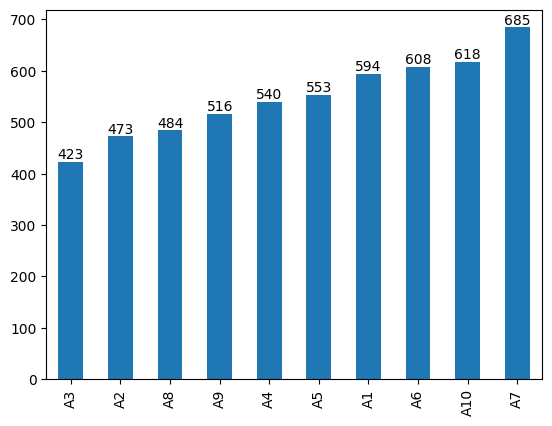

In [ ]:
ax = at.iloc[:, 1:11].sum().sort_values().plot(kind="bar")
ax.bar_label(ax.containers[0]);

In [ ]:
at.isnull().mean() * 100

,0
Case_No,0.0
A1,0.0
A2,0.0
A3,0.0
A4,0.0
A5,0.0
A6,0.0
A7,0.0
A8,0.0
A9,0.0


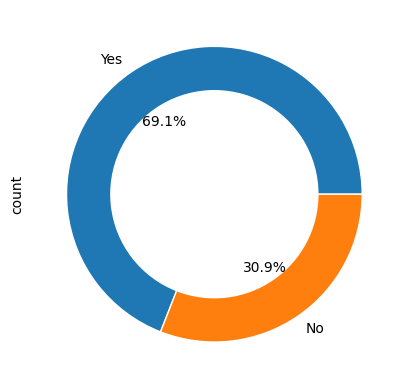

In [ ]:
at["ASD Traits"].value_counts().plot(kind="pie", autopct="%1.1f%%", wedgeprops=dict(width=.3, edgecolor='w'));

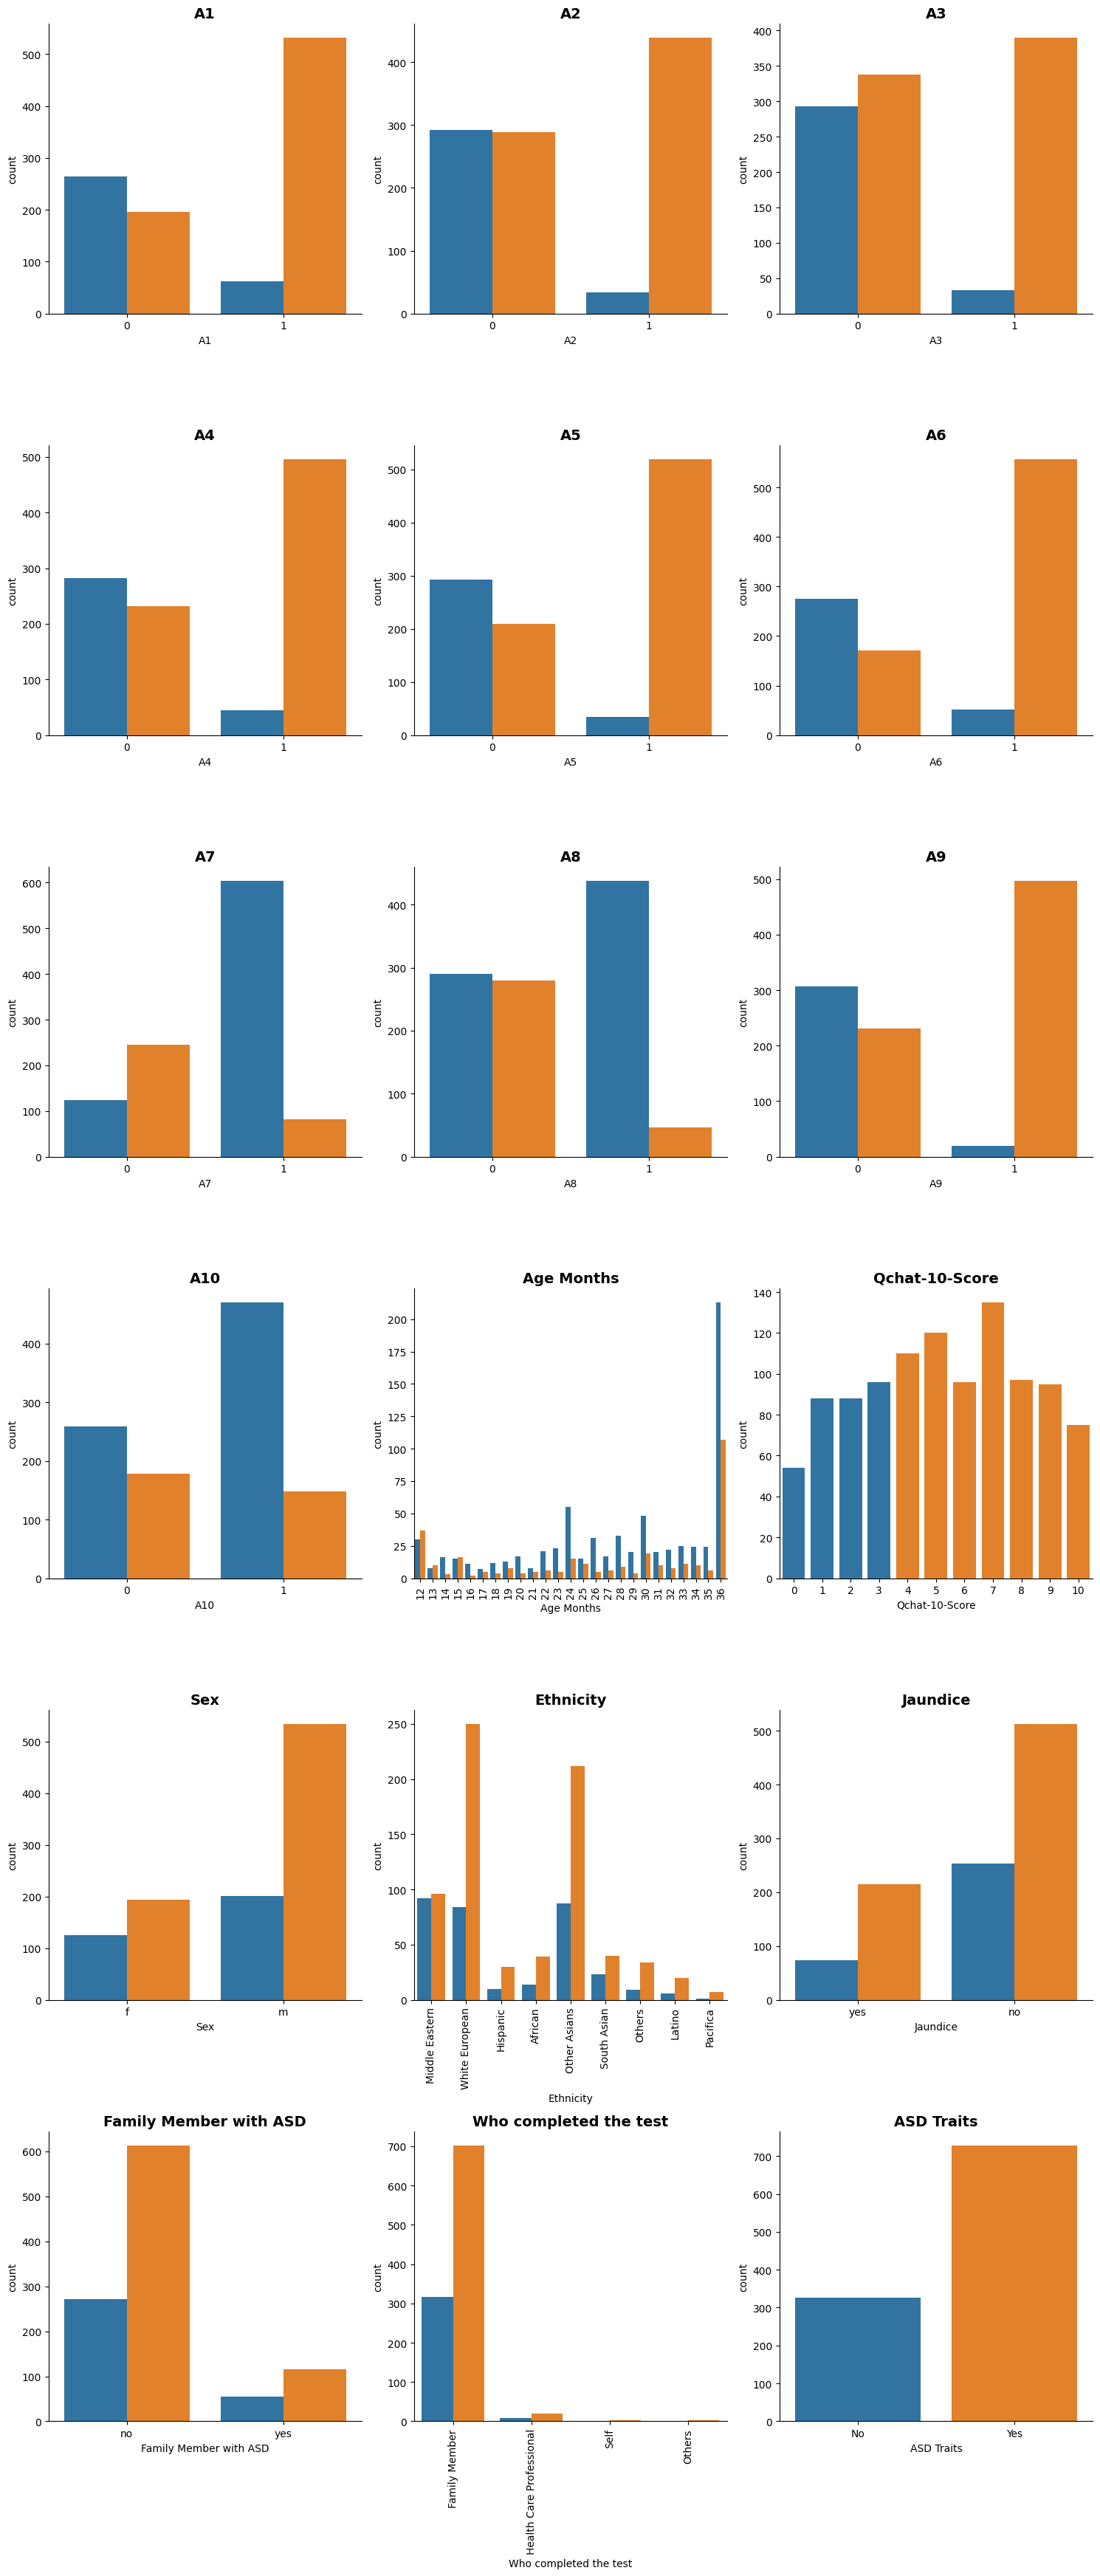

In [ ]:
fig, axes = plt.subplots(6, 3, figsize=(15, 35))
axes = axes.ravel()
for i, col in enumerate(at.iloc[:,1:]):
    sns.countplot(x=at[col], ax=axes[i], hue=at['ASD Traits'], legend=False)
    axes[i].set_title(col, fontsize=14, fontweight="bold")
    if col == "Who completed the test" or col == "Ethnicity" or col == "Age Months":
        axes[i].tick_params(axis="x", labelrotation=90)
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

In [ ]:
at.iloc[:, 11:13].head(1)

,Age Months,Qchat-10-Score
0,28,3


<ipython-input-23-d43a40fc4c52>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=at[col], ax=axes[i])
<ipython-input-23-d43a40fc4c52>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=at[col], ax=axes[i])


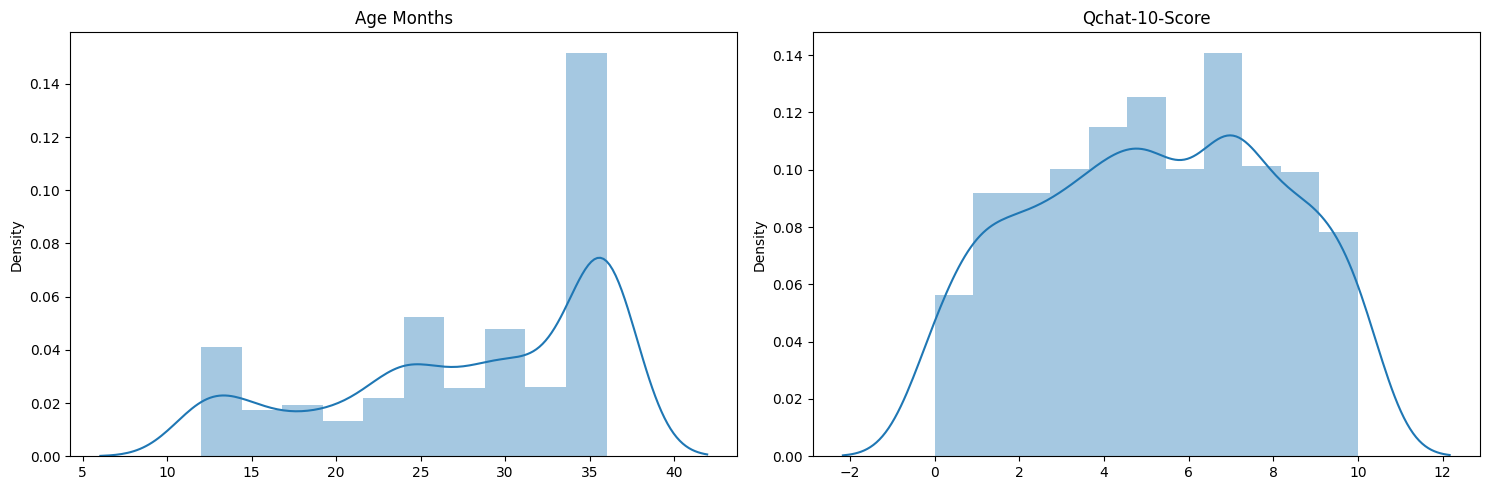

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
axes = axes.ravel()
for i, col in enumerate(at.iloc[:, 11:13]):
    sns.distplot(x=at[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

#DATA PREPROCESSING

In [ ]:
at1 = at.copy()

In [ ]:
at1.drop(columns=["Case_No"], inplace=True)

In [ ]:
mini = at1["Age Months"].min()
maxi = at1["Age Months"].max()
print(f"Minimum age {mini} and Maximum age {maxi}")

Minimum age 12 and Maximum age 36


In [ ]:
at1["Age"] = at1["Age Months"] / 12
at1.drop(columns=["Age Months"], inplace=True)

In [ ]:
at1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family Member with ASD,Who completed the test,ASD Traits,Age
0,0,0,0,0,0,0,1,1,0,1,3,f,Middle Eastern,yes,no,Family Member,No,2.333333
1,1,1,0,0,0,1,1,0,0,0,4,m,White European,yes,no,Family Member,Yes,3.000000
2,1,0,0,0,0,0,1,1,0,1,4,m,Middle Eastern,yes,no,Family Member,Yes,3.000000
3,1,1,1,1,1,1,1,1,1,1,10,m,Hispanic,no,no,Family Member,Yes,2.000000
4,1,1,0,1,1,1,1,1,1,1,9,f,White European,no,yes,Family Member,Yes,1.666667


In [ ]:
at1.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family Member with ASD', 'Who completed the test', 'ASD Traits',
       'Age'],
      dtype='object')

In [ ]:
order = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family Member with ASD', 'Who completed the test', 'ASD Traits',
       'Age']
at1 = at1[order]

In [ ]:
at1.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family Member with ASD,Who completed the test,ASD Traits,Age
0,0,0,0,0,0,0,1,1,0,1,3,f,Middle Eastern,yes,no,Family Member,No,2.333333
1,1,1,0,0,0,1,1,0,0,0,4,m,White European,yes,no,Family Member,Yes,3.000000
2,1,0,0,0,0,0,1,1,0,1,4,m,Middle Eastern,yes,no,Family Member,Yes,3.000000
3,1,1,1,1,1,1,1,1,1,1,10,m,Hispanic,no,no,Family Member,Yes,2.000000
4,1,1,0,1,1,1,1,1,1,1,9,f,White European,no,yes,Family Member,Yes,1.666667


##ONEHOT ENCODING

In [ ]:
le = LabelEncoder()
at1["Sex"] = le.fit_transform(at1["Sex"])
at1["Jaundice"] = le.fit_transform(at1["Jaundice"])
at1["Family Member with ASD"] = le.fit_transform(at1["Family Member with ASD"])
at1["ASD Traits"] = le.fit_transform(at1["ASD Traits"])
at1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family Member with ASD,Who completed the test,ASD Traits,Age
0,0,0,0,0,0,0,1,1,0,1,3,0,Middle Eastern,1,0,Family Member,0,2.333333
1,1,1,0,0,0,1,1,0,0,0,4,1,White European,1,0,Family Member,1,3.000000
2,1,0,0,0,0,0,1,1,0,1,4,1,Middle Eastern,1,0,Family Member,1,3.000000
3,1,1,1,1,1,1,1,1,1,1,10,1,Hispanic,0,0,Family Member,1,2.000000
4,1,1,0,1,1,1,1,1,1,1,9,0,White European,0,1,Family Member,1,1.666667


##ONEHOT ENCODING

In [ ]:
at1 = pd.get_dummies(at1, columns=["Ethnicity", "Who completed the test"], drop_first=True)
at1.head()


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Ethnicity_Latino,Ethnicity_Middle Eastern,Ethnicity_Other Asians,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_South Asian,Ethnicity_White European,Who completed the test_Health Care Professional,Who completed the test_Others,Who completed the test_Self
0,0,0,0,0,0,0,1,1,0,1,...,False,True,False,False,False,False,False,False,False,False
1,1,1,0,0,0,1,1,0,0,0,...,False,False,False,False,False,False,True,False,False,False
2,1,0,0,0,0,0,1,1,0,1,...,False,True,False,False,False,False,False,False,False,False
3,1,1,1,1,1,1,1,1,1,1,...,False,False,False,False,False,False,False,False,False,False
4,1,1,0,1,1,1,1,1,1,1,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
order = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Qchat-10-Score', 'Sex', 'Jaundice', 'Family Member with ASD',
       'Ethnicity_Latino', 'Ethnicity_Others', 'Ethnicity_Pacifica',
       'Ethnicity_White European',
       # The following columns might be missing, so we only include them if they exist:
       'Ethnicity_Asian' if 'Ethnicity_Asian' in at1.columns else None,
       'Ethnicity_Black' if 'Ethnicity_Black' in at1.columns else None,
       'Ethnicity_Middle Eastern' if 'Ethnicity_Middle Eastern' in at1.columns else None,
       'Ethnicity_Mixed' if 'Ethnicity_Mixed' in at1.columns else None,
       'Ethnicity_South Asian' if 'Ethnicity_South Asian' in at1.columns else None,
       'Who completed the test_Health care professional' if 'Who completed the test_Health care professional' in at1.columns else None,
       'Who completed the test_Others' if 'Who completed the test_Others' in at1.columns else None,
       'Who completed the test_Self' if 'Who completed the test_Self' in at1.columns else None,
       'Who completed the test_Family member' if 'Who completed the test_Family member' in at1.columns else None,
       'ASD Traits']

# Filter out None values from the order list
order = [col for col in order if col is not None]

at1 = at1[order] # Reorder columns
at1.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,Family Member with ASD,Ethnicity_Latino,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_Middle Eastern,Ethnicity_South Asian,Who completed the test_Others,Who completed the test_Self,ASD Traits
0,0,0,0,0,0,0,1,1,0,1,...,0,False,False,False,False,True,False,False,False,0
1,1,1,0,0,0,1,1,0,0,0,...,0,False,False,False,True,False,False,False,False,1
2,1,0,0,0,0,0,1,1,0,1,...,0,False,False,False,False,True,False,False,False,1
3,1,1,1,1,1,1,1,1,1,1,...,0,False,False,False,False,False,False,False,False,1
4,1,1,0,1,1,1,1,1,1,1,...,1,False,False,False,True,False,False,False,False,1


##DATA SPLITTING

In [ ]:
X = at1[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age',
       'Qchat-10-Score', 'Sex', 'Jaundice', 'Family Member with ASD',
       'Ethnicity_Latino', 'Ethnicity_Others', 'Ethnicity_Pacifica',
       'Ethnicity_White European', 'Ethnicity_Middle Eastern',
       'Ethnicity_South Asian', 'Who completed the test_Others',
       'Who completed the test_Self']]  # Select your features
y = at1['ASD Traits']  # Select your target variable

In [ ]:
from sklearn.model_selection import train_test_split

# Assuming X and y are defined from the previous code
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Verify class balance in the training and testing sets
print("Training set class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTesting set class distribution:")
print(y_test.value_counts(normalize=True))

Training set class distribution:
ASD Traits
1    0.690638
0    0.309362
Name: proportion, dtype: float64

Testing set class distribution:
ASD Traits
1    0.690852
0    0.309148
Name: proportion, dtype: float64


##FEATURE SCALING

In [ ]:
sc = MinMaxScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

##MODEL BUILDING

In [ ]:



def train_model(model, X_train_scaled, y_train, X_test_scaled, y_test):

    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    score_df = pd.DataFrame([[accuracy, precision, recall, f1]],
                            columns=["accuracy", "precision", "recall", "f1"])
    return score_df

##Logistic Regression

In [ ]:
model = LogisticRegression()

results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

results.index = ["LR"]
results

,accuracy,precision,recall,f1
LR,1.0,1.0,1.0,1.0


In [ ]:
model = LogisticRegression(class_weight='balanced')
results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)
results.index = ["Logistic Regression"]
results

,accuracy,precision,recall,f1
Logistic Regression,0.996845,1.0,0.995434,0.997712


##Decision Tree Classifier

In [ ]:
model = DecisionTreeClassifier(class_weight='balanced')
decision_tree_results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

decision_tree_results.index = ["Decision Tree Classifier"]

y_pred = model.predict(X_test_scaled)


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        98
           1       1.00      1.00      1.00       219

    accuracy                           1.00       317
   macro avg       1.00      1.00      1.00       317
weighted avg       1.00      1.00      1.00       317



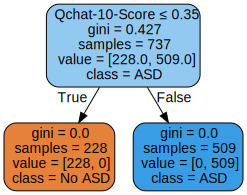

In [ ]:
from sklearn import tree
import graphviz

# Assuming you have already trained your DecisionTreeClassifier model as 'model'
# If not, replace this with your actual model training code

# Create a Decision Tree Classifier object
model = DecisionTreeClassifier()

# Train the model using your training data
model.fit(X_train_scaled, y_train)

# Export the decision tree as a DOT file
dot_data = tree.export_graphviz(model, out_file=None,
                                feature_names=X.columns,
                                class_names=['No ASD', 'ASD'],
                                filled=True, rounded=True,
                                special_characters=True)

# Create a graph from the DOT data
graph = graphviz.Source(dot_data)

# Display the decision tree
graph


##Ensemble Techniques

In [ ]:
model = RandomForestClassifier(class_weight='balanced')
random_forest_results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

random_forest_results.index = ["Random Forest Classifier"]
random_forest_results


,accuracy,precision,recall,f1
Random Forest Classifier,1.0,1.0,1.0,1.0


In [ ]:

model = AdaBoostClassifier()
ada_boost_results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

ada_boost_results.index = ["Ada Boost Classifier"]
ada_boost_results

,accuracy,precision,recall,f1
Ada Boost Classifier,1.0,1.0,1.0,1.0


In [ ]:

model = SVC()
svm_results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

svm_results.index = ["SVM Classifier"]
svm_results

,accuracy,precision,recall,f1
SVM Classifier,0.984227,0.986364,0.990868,0.98861


##KNeighbors

In [ ]:
model = KNeighborsClassifier()
knn_results = train_model(model, X_train_scaled, y_train, X_test_scaled, y_test)

knn_results.index = ["KNeighbors Classifier"]
knn_results


,accuracy,precision,recall,f1
KNeighbors Classifier,0.968454,0.995261,0.958904,0.976744


##Artificial Neural Network

In [ ]:
model = Sequential()
# Change input_dim to match the actual number of features in X_train_scaled
model.add(Dense(32, activation="relu", input_dim=23)) # Changed input_dim to 23

#model.add(Dense(64, activation="relu"))

#model.add(Dense(32, activation="relu"))

model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.001,
    patience=10,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=None
)
history = model.fit(X_train_scaled, y_train, batch_size=10, epochs=68, validation_split=0.2, callbacks=callback)

Epoch 1/68


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


59/59 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3078 - loss: 0.8667 - val_accuracy: 0.7365 - val_loss: 0.6323
Epoch 2/68
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7972 - loss: 0.5737 - val_accuracy: 0.7432 - val_loss: 0.4273
Epoch 3/68
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8169 - loss: 0.3829 - val_accuracy: 0.8784 - val_loss: 0.2825
Epoch 4/68
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9114 - loss: 0.2541 - val_accuracy: 0.9257 - val_loss: 0.1925
Epoch 5/68
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9575 - loss: 0.1782 - val_accuracy: 0.9324 - val_loss: 0.1532
Epoch 6/68
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9636 - loss: 0.1476 - val_accuracy: 0.9324 - val_loss: 0.1444
Epoch 7/68
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9612 - loss: 0.1185 - val_accuracy: 0.9392 - val_loss: 0.1280
Epoch 8/68
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9720 - loss: 0.0942 - val_accuracy: 0.9527 - val_loss: 0.1079
Epo

In [ ]:
y_prob = model.predict(X_test_scaled)
y_pred = np.where(y_prob > 0.5, 1, 0)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

nn_df = pd.DataFrame([[accuracy, precision, recall, f1]],
                     columns=['accuracy', 'precision', 'recall', 'f1'])
nn_df.index = ["Artificial Neural Network"]
nn_df

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


,accuracy,precision,recall,f1
Artificial Neural Network,0.987382,0.986425,0.995434,0.990909


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.012618296529968454
Root Mean Squared Error (RMSE): 0.012618296529968454


                           accuracy  precision    recall        f1
Logistic Regression        0.996845   1.000000  0.995434  0.997712
SVM Classifier             0.984227   0.986364  0.990868  0.988610
KNeighbors Classifier      0.968454   0.995261  0.958904  0.976744
Artificial Neural Network  0.987382   0.986425  0.995434  0.990909


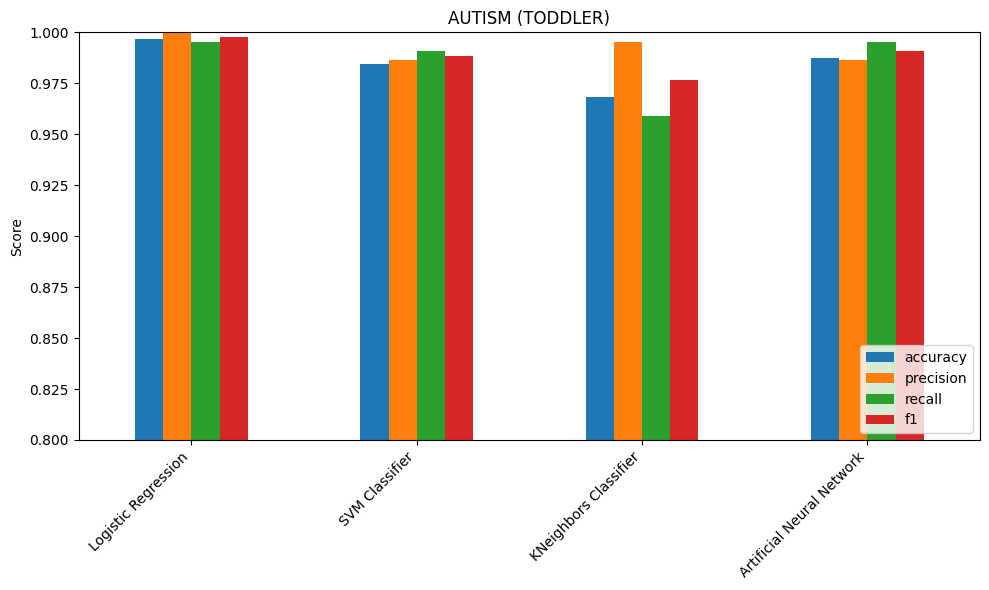

In [ ]:
 # Combine the results from all models into a single DataFrame
all_results = pd.concat([results, svm_results, knn_results, nn_df])

# Display the comparison table
print(all_results)

# You can also visualize the results using a bar plot
all_results.plot(kind='bar', figsize=(10, 6))
plt.title('AUTISM (TODDLER)')
plt.ylabel('Score')
plt.ylim(0.8, 1)
plt.xticks(rotation=45, ha='right')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [ ]:

for col in at.columns:
    print(f"Column: {col}")
    print(at[col].unique())
    print("-" * 20)

Column: Case_No
[   1    2    3 ... 1052 1053 1054]
--------------------
Column: A1
[0 1]
--------------------
Column: A2
[0 1]
--------------------
Column: A3
[0 1]
--------------------
Column: A4
[0 1]
--------------------
Column: A5
[0 1]
--------------------
Column: A6
[0 1]
--------------------
Column: A7
[1 0]
--------------------
Column: A8
[1 0]
--------------------
Column: A9
[0 1]
--------------------
Column: A10
[1 0]
--------------------
Column: Age Months
[28 36 24 20 21 33 22 17 25 15 18 12 29 35 32 19 14 13 30 23 34 26 31 27
 16]
--------------------
Column: Qchat-10-Score
[ 3  4 10  9  8  5  6  2  0  7  1]
--------------------
Column: Sex
['f' 'm']
--------------------
Column: Ethnicity
['Middle Eastern' 'White European' 'Hispanic' 'African' 'Other Asians'
 'South Asian' 'Others' 'Latino' 'Pacifica']
--------------------
Column: Jaundice
['yes' 'no']
--------------------
Column: Family Member with ASD
['no' 'yes']
--------------------
Column: Who completed the test
['Fa